#UPDATE 01/07/2025: add the temp data

In [1]:

import numpy as np 
import sys

    
import xarray as xr 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 
import matplotlib as mpl
from scipy import signal #for filtering
print("Modules imported")




Modules imported


In [2]:
# velocity = data.horizontalVelX.isel(time=40, nSCHISM_vgrid_layers=0).values

import re 
file="/global/scratch/users/jennaisrael/run_schism/run_26/station.in"
station_id =[]
with open(file) as f:
    f.readline()
    for station in range(int(f.readline())):
        line = f.readline()
        if '!' in line:
            station_id.append(line.split('!')[-1])
        else:
            station_id.append(None)
# print(station_id)

print(len(station_id))

stations = []
for sublist in station_id:
    match = re.search(r'"(.*?)"', sublist)
    if match:
        stations.append(match.group(1).strip())
    else :
        stations.append(sublist.replace("\n", "").strip())
print(len(set(stations)))


for i, station in enumerate(stations):
    print("%d == %s" % (i,station))


263
240
0 == San Joaquin at Antioch
1 == Mokelumne River at Benson's Ferry
2 == Cache Slough
3 == Old River at Coney Island
4 == Clifton Court
5 == Discovery Bay at Indian Slough
6 == Doughty Cut above Grant Line Canal
7 == Sacramento River at Emmaton
8 == EMM upper Emmaton
9 == EMM lower Emmaton
10 == Farrar Park
11 == Grant Line Canal at Tracy Rd Bridge
12 == Green's Landing
13 == Harvey O Banks PP
14 == Holland Tract
15 == Harvey O Banks PP
16 == CCWD Old River near Discovery Bay
17 == CCWD Rock Slough PP
18 == Italian Slough Headwater near Byron
19 == Jersey Point
20 == Sacramento River at Mallard Island
21 == Sacramento River at Mallard Island
22 == Middle River at Howard Rd Bridge
23 == San Joaquin at Mossdale Bridge
24 == Middle River at Tracy Blvd
25 == Old River Barrier near DMC (Above)
26 == Old River below Dam
27 == Old River at Bacon Island
28 == Old River at Head
29 == Old River at Byron
30 == Prisoners Point
31 == Rock Slough at Contra Costa Canal
32 == San Andreas Landin

In [3]:
import pandas as pd

columns = ['time']
stations_no = [str(i) for i in range(263)]
columns = columns + stations_no



# These outputs are invoked with iout_sta=1, and are found in outputs/staout_[1..,9], corresponding respectively to elev, air pressure, wind u, wind v, T, S, u, v, w. Each output has a simple ASCII format:
# Time(sec), variable @ station 1,2,…. (specified in station.in)

#file="//global/scratch/users/jennaisrael/run_schism/run_8/outputs_barotropic/staout_1"
file="//global/scratch/users/jennaisrael/run_schism/run_26/outputs/staout_1"# 1:elev,2:air pressure,3:wind_x,4:wind_y,5:temp,6:salt,7:u,8:v,9:w
data = pd.read_csv(file, sep='\s+', names=columns) #, decode_times=False)
data = data.apply(pd.to_numeric)

 
# Add in the number of seconds elapsed @ our chosen timestep
timedelta = [pd.Timedelta(i, unit = 's') for i in data.time]
timestamp = [pd.to_datetime("03-30-2014 00:00") + i for i in timedelta]
    
data["time"] = timestamp



In [4]:
data

,time,0,1,2,3,4,5,6,7,8,...,253,254,255,256,257,258,259,260,261,262
0,2014-03-30 00:15:00,0.980225,1.04381,0.996266,0.974619,0.970298,0.976395,0.996294,0.980206,0.980206,...,-9999.0,1.032100,1.38272,1.025290,1.19751,1.43919,1.43919,1.046220,1.17839,1.48217
1,2014-03-30 00:30:00,0.975780,1.06806,1.024320,0.985046,0.970056,0.975350,1.004180,0.995365,0.995365,...,-9999.0,0.995910,1.18407,1.087330,1.13930,1.31426,1.31426,1.096140,1.12604,1.20750
2,2014-03-30 00:45:00,0.981232,1.04160,1.058370,0.984014,0.969779,0.974578,1.026540,1.007620,1.007620,...,-9999.0,1.018070,1.12868,1.092670,1.12129,1.23556,1.23556,1.100130,1.10972,1.10738
3,2014-03-30 01:00:00,0.994228,1.01371,1.085700,0.982071,0.969456,0.973694,1.035500,1.009720,1.009720,...,-9999.0,1.007000,1.11126,1.074600,1.10261,1.18015,1.18015,1.082130,1.09355,1.07473
4,2014-03-30 01:15:00,1.011790,1.00285,1.094770,0.980154,0.969018,0.973805,1.029600,1.027990,1.027990,...,-9999.0,1.001440,1.09738,1.062680,1.08534,1.14841,1.14841,1.068670,1.08050,1.07786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20345,2014-10-27 22:30:00,0.697594,1.52881,1.313640,1.496250,1.195130,1.422190,1.727280,0.705465,0.705465,...,-9999.0,0.450937,1.39798,1.145850,1.29066,1.40784,1.40784,1.186290,1.27321,1.30128
20346,2014-10-27 22:45:00,0.652746,1.49207,1.267530,1.456310,1.193860,1.381080,1.707040,0.657174,0.657174,...,-9999.0,0.401734,1.35773,1.094180,1.24256,1.36587,1.36587,1.133960,1.22443,1.25192
20347,2014-10-27 23:00:00,0.610781,1.45597,1.221570,1.415490,1.192590,1.339810,1.686540,0.612408,0.612408,...,-9999.0,0.355778,1.31619,1.042560,1.19556,1.32435,1.32435,1.081670,1.17659,1.20468
20348,2014-10-27 23:15:00,0.570816,1.42054,1.175510,1.374390,1.191310,1.298590,1.664890,0.569279,0.569279,...,-9999.0,0.312426,1.27282,0.991859,1.14842,1.28261,1.28261,1.030320,1.12968,1.15631


AxesSubplot(0.125,0.11;0.775x0.77)


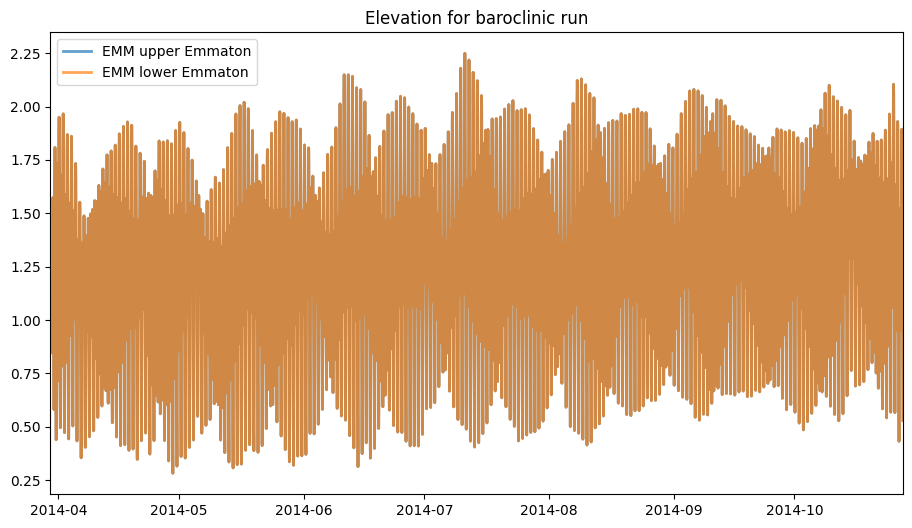

In [5]:
# Make a plot
plt.ioff()

#station_indices=[0, 208, 2, 62, 105]
#station_indices=[47,48,56,7,8,9] #first are 2 martinez, then Old River near Clifton court intake, last 3 are emmaton
station_indices=[8,9]#47,48,56,7,8,9,]
fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    values = data[str(idx)]
    ax.plot(data.time, values, label = stations[idx], linewidth=2, alpha =0.7)
    

leg = ax.legend()
print(ax)
ax.set_xlim(data.time.iloc[0], data.time.iloc[-1])
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Elevation for baroclinic run")
plt.show()
# ax.grid()


AxesSubplot(0.125,0.11;0.775x0.77)


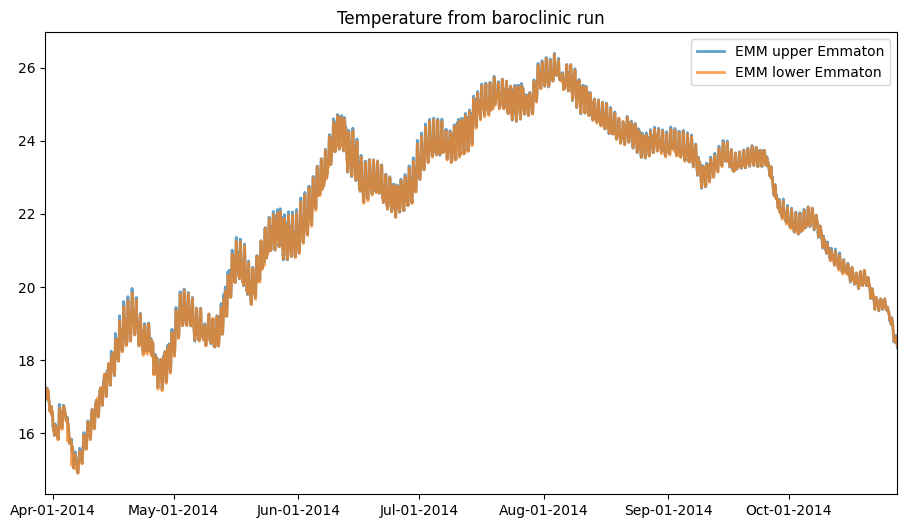

In [6]:
file="//global/scratch/users/jennaisrael/run_schism/run_26/outputs/staout_5" #1:elev,2:air pressure,3:wind_x,4:wind_y,5:temp,6:salt,7:u,8:v,9:w
data = pd.read_csv(file, sep='\s+', names=columns) #, decode_times=False)
data = data.apply(pd.to_numeric)

 
# Add in the number of seconds elapsed @ our chosen timestep
timedelta = [pd.Timedelta(i, unit = 's') for i in data.time]
timestamp = [pd.to_datetime("03-30-2014 00:00") + i for i in timedelta]
    
data["time"] = timestamp


fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    values = data[str(idx)]
    ax.plot(data.time, values, label = stations[idx], linewidth=2, alpha =0.7)
    

leg = ax.legend()
print(ax)
ax.set_xlim(data.time.iloc[0], data.time.iloc[-1])
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Temperature from baroclinic run")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
plt.show()
# ax.grid()

AxesSubplot(0.125,0.11;0.775x0.77)


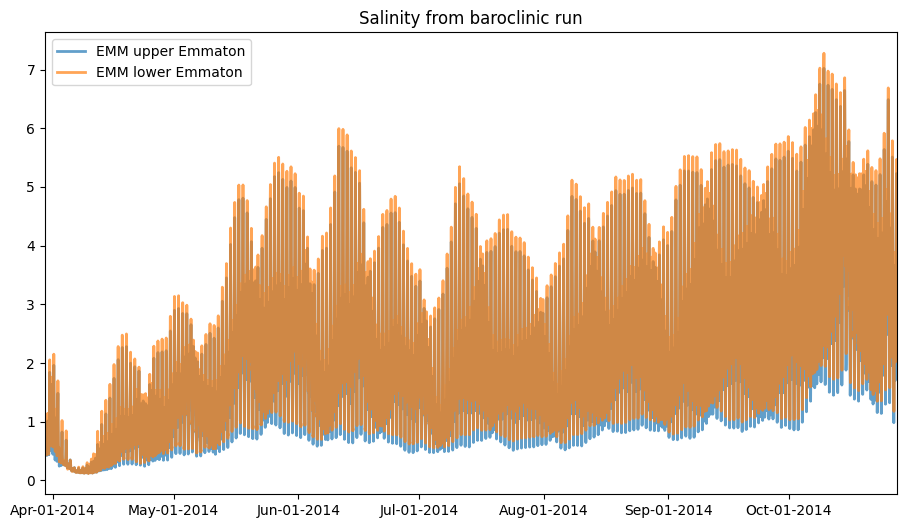

In [7]:
file="//global/scratch/users/jennaisrael/run_schism/run_26/outputs/staout_6" #1:elev,2:air pressure,3:wind_x,4:wind_y,5:temp,6:salt,7:u,8:v,9:w
data = pd.read_csv(file, sep='\s+', names=columns) #, decode_times=False)
data = data.apply(pd.to_numeric)

 
# Add in the number of seconds elapsed @ our chosen timestep
timedelta = [pd.Timedelta(i, unit = 's') for i in data.time]
timestamp = [pd.to_datetime("03-30-2014 00:00") + i for i in timedelta]
    
data["time"] = timestamp


fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    values = data[str(idx)]
    ax.plot(data.time, values, label = stations[idx], linewidth=2, alpha =0.7)
    

leg = ax.legend()
print(ax)
ax.set_xlim(data.time.iloc[0], data.time.iloc[-1])
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Salinity from baroclinic run")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
plt.show()
# ax.grid()

In [8]:
#convert from PSU to uS/cm (at Emmaton the limit is 1000 uS/cm)
from vtools.functions.unit_conversions import cfs_to_cms, ft_to_m, ec_psu_25c, fahrenheit_to_celsius
std= ec_psu_25c(1000)
print(std)

/global/home/users/jennaisrael/.conda/envs/schimpy/lib/python3.7/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.4919575246252693


In [13]:
#make a plot with upper Emmaton from the historical and 2 slr studies with a line for the standard
#set the x axis to exclude the first 90 days

file1="//global/scratch/users/jennaisrael/run_schism/run_26/outputs/staout_6" #1:elev,2:air pressure,3:wind_x,4:wind_y,5:temp,6:salt,7:u,8:v,9:w
file2="//global/scratch/users/jennaisrael/run_schism/run_25/outputs/staout_6"
file3="//global/scratch/users/jennaisrael/run_schism/run_27/outputs/staout_6"
file4="//global/scratch/users/jennaisrael/run_schism/run_28/outputs/staout_6"
data1 = pd.read_csv(file1, sep='\s+', names=columns) #, decode_times=False)
data1 = data1.apply(pd.to_numeric)
data2 = pd.read_csv(file2, sep='\s+', names=columns) #, decode_times=False)
data2 = data2.apply(pd.to_numeric)
data3 = pd.read_csv(file3, sep='\s+', names=columns) #, decode_times=False)
data3 = data3.apply(pd.to_numeric)
data4 = pd.read_csv(file4, sep='\s+', names=columns) #, decode_times=False)
data4 = data4.apply(pd.to_numeric)
 
# Add in the number of seconds elapsed @ our chosen timestep
timedelta1 = [pd.Timedelta(i, unit = 's') for i in data1.time]
timestamp1 = [pd.to_datetime("03-30-2014 00:00") + i for i in timedelta1]    
data1["time"] = timestamp1

timedelta2 = [pd.Timedelta(i, unit = 's') for i in data2.time]
timestamp2 = [pd.to_datetime("03-30-2014 00:00") + i for i in timedelta2]
data2["time"] = timestamp2

timedelta3 = [pd.Timedelta(i, unit = 's') for i in data3.time]
timestamp3 = [pd.to_datetime("03-30-2014 00:00") + i for i in timedelta3]
data3["time"] = timestamp3

timedelta4 = [pd.Timedelta(i, unit = 's') for i in data4.time]
timestamp4 = [pd.to_datetime("03-30-2014 00:00") + i for i in timedelta4]
data4["time"] = timestamp4


AxesSubplot(0.125,0.11;0.775x0.77)


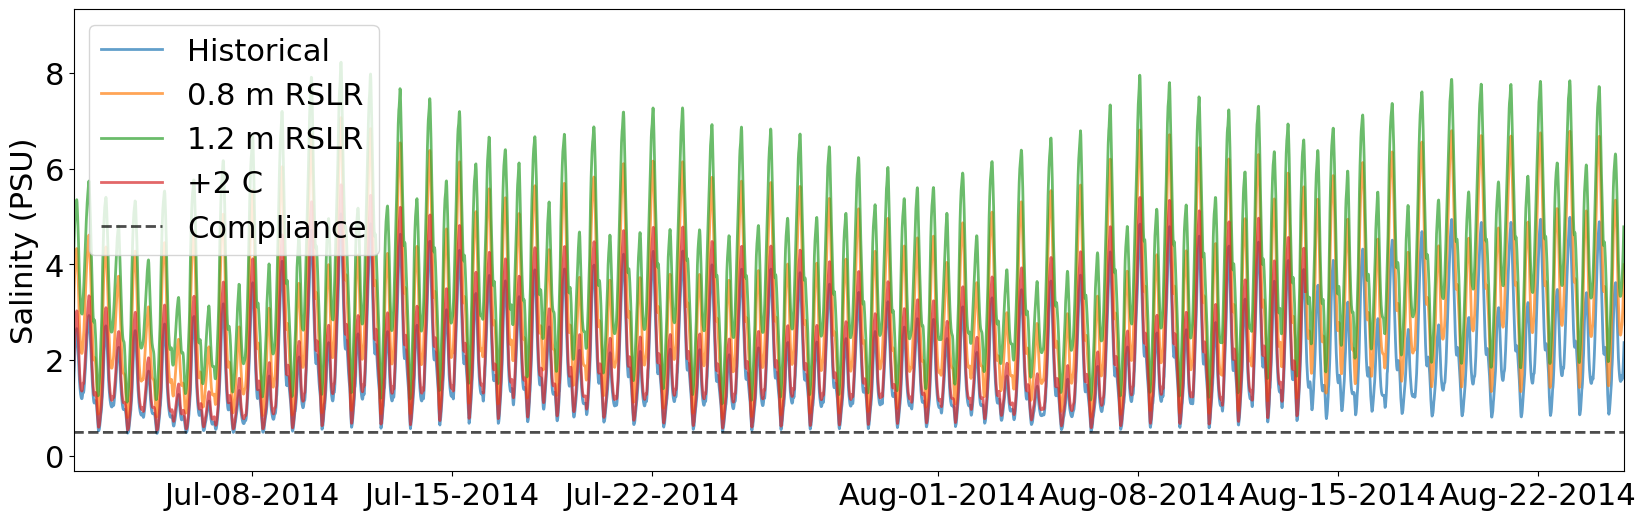

In [14]:
station_indices=[8]
fig = plt.figure(figsize=(20,6))
mpl.rcParams.update({'font.size': 22})
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    values1 = data1[str(idx)]
    values2 = data2[str(idx)]
    values3 = data3[str(idx)]
    values4 = data4[str(idx)]
    ax.plot(data1.time, values1, label = 'Historical', linewidth=2, alpha =0.7)
    ax.plot(data2.time, values2, label = '0.8 m RSLR', linewidth=2, alpha =0.7)
    ax.plot(data3.time, values3, label = '1.2 m RSLR', linewidth=2, alpha =0.7)
    ax.plot(data4.time, values4, label = '+2 C', linewidth=2, alpha =0.7)

ax.plot(data1.time,np.ones_like(values1)*std,linewidth=2, alpha =0.7,linestyle='--',color='k',label='Compliance')

leg = ax.legend()
print(ax)
ax.set_xlim(data1.time.iloc[9000], data3.time.iloc[-1]) #July 1 to end
# ax.grid(which='major', color='b', linestyle='-')
#ax.set_title("Salinity from baroclinic run")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
ax.set_ylabel('Salinity (PSU)')
plt.show()
# ax.grid()



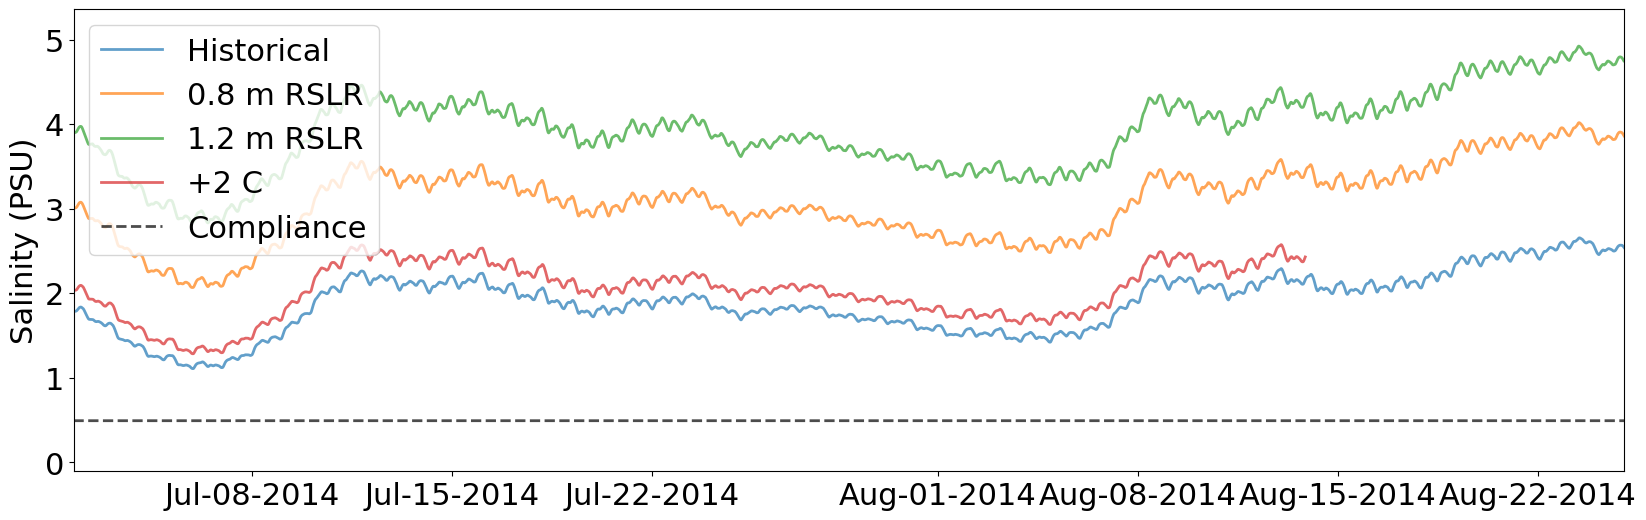

In [15]:
station_indices=[8]
fig = plt.figure(figsize=(20,6))
mpl.rcParams.update({'font.size': 22})
ax = plt.gca()
# ax.grid(alpha=0.5)
N=96
for idx in station_indices:
    #running average, currently frequency is every 15 min, so a 24 hr average would be every 96 samples
    
    values1=np.convolve(data1[str(idx)], np.ones(N)/N, mode='valid')
    values2=np.convolve(data2[str(idx)], np.ones(N)/N, mode='valid')
    values3=np.convolve(data3[str(idx)], np.ones(N)/N, mode='valid')
    values4=np.convolve(data4[str(idx)], np.ones(N)/N, mode='valid')
    #lose the first 96 elements so trim the time vector
    ax.plot(data1.time.iloc[95:], values1, label = 'Historical', linewidth=2, alpha =0.7)
    ax.plot(data2.time.iloc[95:], values2, label = '0.8 m RSLR', linewidth=2, alpha =0.7)
    ax.plot(data3.time.iloc[95:], values3, label = '1.2 m RSLR', linewidth=2, alpha =0.7)
    ax.plot(data4.time.iloc[95:], values4, label = '+2 C', linewidth=2, alpha =0.7)
    
ax.plot(data1.time.iloc[95:],np.ones_like(values1)*std,linewidth=2, alpha =0.7,linestyle='--',color='k',label='Compliance')

leg = ax.legend()
#print(ax)
ax.set_xlim(data1.time.iloc[9000], data3.time.iloc[-1]) #July 1 to end
# ax.grid(which='major', color='b', linestyle='-')
#ax.set_title("Salinity from baroclinic run")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
ax.set_ylabel('Salinity (PSU)')
plt.show()
# ax.grid()



In [12]:
data1.time

0       2014-03-30 00:15:00
1       2014-03-30 00:30:00
2       2014-03-30 00:45:00
3       2014-03-30 01:00:00
4       2014-03-30 01:15:00
                ...        
20345   2014-10-27 22:30:00
20346   2014-10-27 22:45:00
20347   2014-10-27 23:00:00
20348   2014-10-27 23:15:00
20349   2014-10-27 23:30:00
Name: time, Length: 20350, dtype: datetime64[ns]

In [19]:
raw=data1[str(8)]

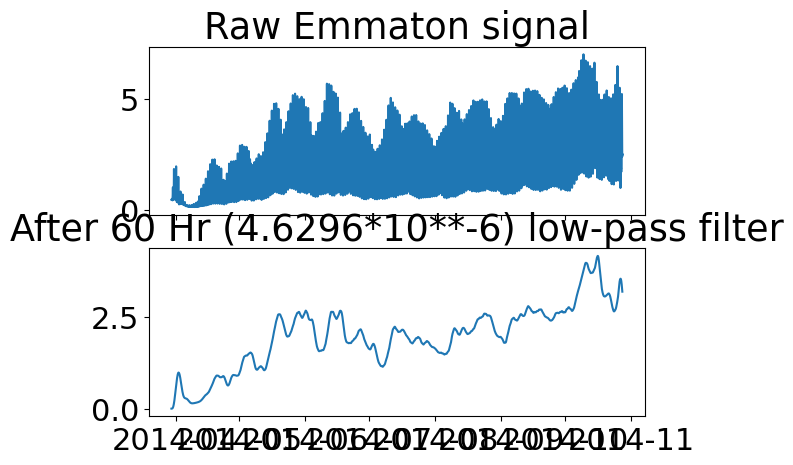

In [20]:
#Low pass filter the tidal signal
#sos = signal.butter(4, 6.944*10**-6, 'lp', fs=0.001111, output='sos') #sampling frequency in hz (15 minutes), below 40 hrs
#sos = signal.butter(4, 9.259*10**-6, 'lp', fs=0.001111, output='sos') #sampling frequency in hz (15 minutes), below 30 hrs
#sos = signal.butter(4, 4.6296*10**-6, 'lp', fs=0.001111, output='sos') #sampling frequency in hz (15 minutes), below 60 hrs
sos = signal.butter(4, 3.472*10**-6, 'lp', fs=0.001111, output='sos') #sampling frequency in hz (15 minutes), below 80 hrs
filtered = signal.sosfilt(sos,raw)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(data1.time, raw)

ax1.set_title('Raw Emmaton signal')
ax2.plot(data1.time, filtered)

ax2.set_title('After 60 Hr (4.6296*10**-6) low-pass filter')
plt.show()

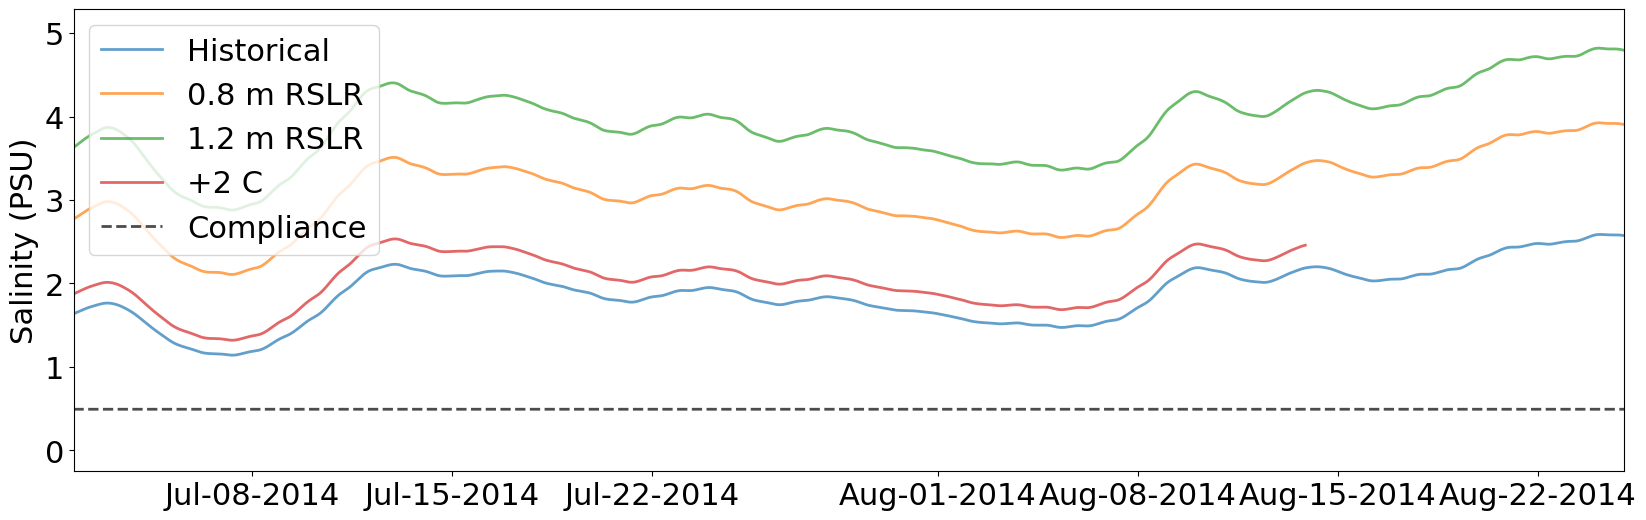

In [22]:
#try 4th order butterworth instead of average

station_indices=[8]
fig = plt.figure(figsize=(20,6))
mpl.rcParams.update({'font.size': 22})
ax = plt.gca()
# ax.grid(alpha=0.5)
#N=96
for idx in station_indices:
    #running average, currently frequency is every 15 min, so a 24 hr average would be every 96 samples
    
    values1=signal.sosfilt(sos,data1[str(idx)])
    values2=signal.sosfilt(sos,data2[str(idx)])
    values3=signal.sosfilt(sos,data3[str(idx)])
    values4=signal.sosfilt(sos,data4[str(idx)])
    #lose the first 96 elements so trim the time vector
    ax.plot(data1.time, values1, label = 'Historical', linewidth=2, alpha =0.7)
    ax.plot(data2.time, values2, label = '0.8 m RSLR', linewidth=2, alpha =0.7)
    ax.plot(data3.time, values3, label = '1.2 m RSLR', linewidth=2, alpha =0.7)
    ax.plot(data4.time, values4, label = '+2 C', linewidth=2, alpha =0.7)
    
ax.plot(data1.time,np.ones_like(values1)*std,linewidth=2, alpha =0.7,linestyle='--',color='k',label='Compliance')

leg = ax.legend()
#print(ax)
ax.set_xlim(data1.time.iloc[9000], data3.time.iloc[-1]) #July 1 to end
# ax.grid(which='major', color='b', linestyle='-')
#ax.set_title("Salinity from baroclinic run")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
ax.set_ylabel('Salinity (PSU)')
plt.show()
# ax.grid()



In [39]:
#find time index of worst daily salinity
#for values from filtered data, N=0 (was previously window size for moving average)
N=0
ind1=np.argmax(values1[9000:])
print(ind1+9000)
print(data1.time.iloc[ind1+N+9000])
ind2=np.argmax(values2[9000:])
print(ind2+9000)
print(data2.time.iloc[ind2+N+9000])
ind3=np.argmax(values3[9000:])
print(ind3+9000)
print(data3.time.iloc[ind3+N+9000])
#I think they have only all reached 8/23/2014 so pick that date

19242
2014-10-16 10:45:00
16101
2014-09-13 17:30:00
14122
2014-08-24 02:45:00


In [40]:
print(data.time.iloc[0])
print(data.time.iloc[1])

2014-03-30 00:15:00
2014-03-30 00:30:00


In [41]:
#What about the Value of change in salinity on this date at emmaton,tracy PP, , and franks tract? 
station_indices=[8,55,199]
time_idx=ind3+N+9000
for idx in station_indices:
    #first index the daily average on this day (147th day after start)
    print(data2[str(idx)].iloc[time_idx]-data1[str(idx)].iloc[time_idx])
    print(data3[str(idx)].iloc[time_idx]-data1[str(idx)].iloc[time_idx])
          
    #subtract the SLR scenario from
    

1.78444
2.83554
0.140216
0.25989100000000004
0.15015
0.284679


In [16]:
#file="//global/scratch/users/jennaisrael/run_schism/run_8/outputs_barotropic/staout_5"
file="//global/scratch/users/jennaisrael/run_schism/run_23/outputs/staout_5"
data = pd.read_csv(file, sep='\s+', names=columns) #, decode_times=False)
data = data.apply(pd.to_numeric)

 
# Add in the number of seconds elapsed @ our chosen timestep
timedelta = [pd.Timedelta(i, unit = 's') for i in data.time]
timestamp = [pd.to_datetime("02-16-2018 00:00") + i for i in timedelta]
    
data["time"] = timestamp


AxesSubplot(0.125,0.11;0.775x0.77)


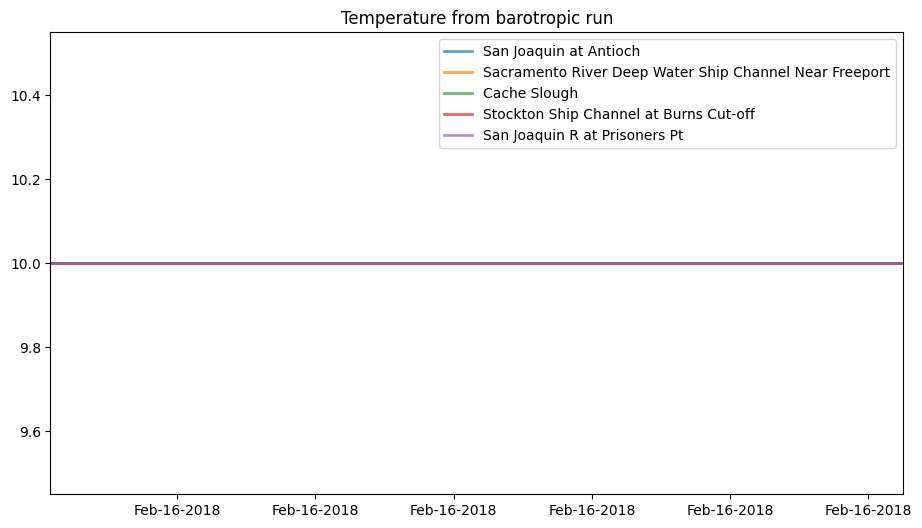

In [17]:
import matplotlib.dates as mdates 
station_indices=[0, 208, 2, 62, 105]

fig = plt.figure(figsize=(11,6))
ax = plt.gca()
# ax.grid(alpha=0.5)
for idx in station_indices:
    values = data[str(idx)]
    ax.plot(data.time, values, label = stations[idx], linewidth=2, alpha =0.7)
    

leg = ax.legend()
print(ax)
ax.set_xlim(data.time.iloc[0], data.time.iloc[-1])
# ax.grid(which='major', color='b', linestyle='-')
ax.set_title("Temperature from barotropic run")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
plt.show()
# ax.grid()

In [18]:
# pip install cartopy

In [19]:
hgrid =xr.open_dataset("//global/scratch/users/jennaisrael/run_schism/run_8/hgrid.nc")
hgrid.head()

OSError: [Errno -101] NetCDF: HDF error: b'//global/scratch/users/jennaisrael/run_schism/run_8/hgrid.nc'

In [ ]:
# hgrid.make_plot(show=True)

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib.collections import PolyCollection
# axes.tricontourf(self.x, self.y, self.triangles, self.values, **kwargs)
# plt.tricontour(hgrid.x, hgrid.y,hgrid.triangles, velocity, levels=10)

fig = plt.figure() 
ax = plt.gca()
ax.tripcolor(hgrid.x, hgrid.y, hgrid.triangles, velocity+100, shading='flat', vmin=0, vmax = 0.4)

pc = PolyCollection(hgrid.coords[hgrid.quads])
# quad_value = np.mean(self.values[self.quads], axis=1)
# pc.set_array(quad_value)
pc.set_array(velocity)
ax.add_collection(pc)
            
            
# hgrid.quadface(ax=ax)
ax.set_xlim(550000, 650000)
# ax.axis([550000, 650000, 4.14e6, 4.3e6])
ax.axis("scaled")
cbar = plt.colorbar(pc, orientation="horizontal")
# hgrid.triplot()
# tricontourf(self, axes=None, show=True, figsize=None, **kwargs):
#         if len(self.triangles) > 0:
#             axes.tricontourf(self.x, self.y, self.triangles, self.values, **kwargs)
#         return axes